In [97]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

In [109]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [9]:
website = 'https://www.emerald-ventures.com/portfolio/'
r = requests.get(website)

In [10]:
r.text[:500]

'<!DOCTYPE html>\n<html lang="en-US" class="no-js">\n<head>\n\n<meta charset="utf-8">\n<!-- \n\tThis website is powered by TYPO3 - inspiring people to share!\n\tTYPO3 is a free open source Content Management Framework initially created by Kasper Skaarhoj and licensed under GNU/GPL.\n\tTYPO3 is copyright 1998-2019 of Kasper Skaarhoj. Extensions are copyright of their respective owners.\n\tInformation and contribution at https://typo3.org/\n-->\n\n<base href="https://www.emerald-ventures.com/">\n\n<title>Portfolio</'

In [17]:
soup = BeautifulSoup(r.text)

In [41]:
results = soup.find_all('div', attrs={'class':'portfolio-company'})
results[:2]

[<div class="portfolio-company" data-category="materials agriculture ">
 <a href="portfolio/?tx_emeraldportfolio_renderer%5Bcompany%5D=4&amp;tx_emeraldportfolio_renderer%5Baction%5D=show&amp;tx_emeraldportfolio_renderer%5Bcontroller%5D=Company&amp;cHash=6b73cbef971e3c9c20550023f312c0c1" title="More about ABN"><img alt="Logo of ABN" height="330" src="fileadmin/user_upload/portfolio/portfolio-logo-overview-abn.jpg" title="ABN" width="440"/></a>
 <div class="company-info">
 <h2>ABN</h2>
 <p>Stabilization, protection and delivery of bio-actives in aquaculture, agriculture and nutrition.</p>
 </div>
 </div>, <div class="portfolio-company" data-category="materials agriculture ">
 <a href="portfolio/?tx_emeraldportfolio_renderer%5Bcompany%5D=3&amp;tx_emeraldportfolio_renderer%5Baction%5D=show&amp;tx_emeraldportfolio_renderer%5Bcontroller%5D=Company&amp;cHash=62e159f56a32276c4e2ce02f22cb7faa" title="More about AgraQuest"><img alt="Logo of AgraQuest" height="330" src="fileadmin/user_upload/port

In [60]:
company = results[0].find('h2').text
company 

'ABN'

In [65]:
company = results[1].find('h2').text
company

'AgraQuest'

In [81]:
if len(results[0].find_all('div', attrs={'class':"label-exited"})) == 1:
    exit = 'Yes'
else:
    exit = 'No'
print(exit)

No


In [77]:
results[1].find_all('div', attrs={'class':"label-exited"})

[<div class="label-exited"><img alt="" height="210" src="typo3conf/ext/emerald_portfolio/Resources/Public/Images/portfolio-overview-exited.png" width="280"/></div>]

In [55]:
catagory = results[0]['data-category'].strip()
catagory

'materials agriculture'

In [59]:
decription = results[0].find('p').text
decription

'Stabilization, protection and delivery of bio-actives in aquaculture, agriculture and nutrition.'

In [82]:
porfolio_companies = []
for result in results:
    company = result.find('h2').text
    catagory = result['data-category'].strip()
    decription = result.find('p').text
    
    if len(result.find_all('div', attrs={'class':"label-exited"})) == 1:
        exit = 'Yes'
    else:
        exit = 'No'
    
    porfolio_company = {'Company':company, 
                        'Catagory':catagory, 
                        'Decription':decription, 
                        'Exit':exit}
    porfolio_companies.append(porfolio_company)
    
porfolio_companies

[{'Company': 'ABN',
  'Catagory': 'materials agriculture',
  'Decription': 'Stabilization, protection and delivery of bio-actives in aquaculture, agriculture and nutrition.',
  'Exit': 'No'},
 {'Company': 'AgraQuest',
  'Catagory': 'materials agriculture',
  'Decription': 'Biopesticides to increase agricultural production. Acquired by Bayer CropScience.',
  'Exit': 'Yes'},
 {'Company': 'AlphaICs',
  'Catagory': 'industrial-it',
  'Decription': 'Microprocessors for Advanced AI Applications',
  'Exit': 'No'},
 {'Company': 'Angstrom',
  'Catagory': 'energy materials',
  'Decription': 'Micro-structured fuel cells based on a novel fuel cell architecture.',
  'Exit': 'Yes'},
 {'Company': 'AquaSpy',
  'Catagory': 'industrial-it water agriculture',
  'Decription': 'Advanced soil monitoring technologies for the agriculture industry.',
  'Exit': 'Yes'},
 {'Company': 'Arxx',
  'Catagory': 'materials',
  'Decription': 'Green building envelope solutions.',
  'Exit': 'Yes'},
 {'Company': 'Catalytic 

In [84]:
df_porfolio = pd.DataFrame(porfolio_companies)
df_porfolio

,Company,Catagory,Decription,Exit
0,ABN,materials agriculture,"Stabilization, protection and delivery of bio-...",No
1,AgraQuest,materials agriculture,Biopesticides to increase agricultural product...,Yes
2,AlphaICs,industrial-it,Microprocessors for Advanced AI Applications,No
3,Angstrom,energy materials,Micro-structured fuel cells based on a novel f...,Yes
4,AquaSpy,industrial-it water agriculture,Advanced soil monitoring technologies for the ...,Yes
5,Arxx,materials,Green building envelope solutions.,Yes
6,Catalytic Solutions,materials,Catalytic converters for automotive emission c...,Yes
7,Cellex Power,energy,Fuel cells for application in the lift trucks ...,Yes
8,Energya Wind Technologies,energy,Global designer and manufacturer of direct dri...,No
9,EnOcean,energy industrial-it,Energy harvesting wireless sensors for smart b...,No


In [85]:
df_porfolio.to_csv('Emerald Profolio Companies.csv')

In [94]:
exit = df_porfolio.groupby('Exit').count()['Company']

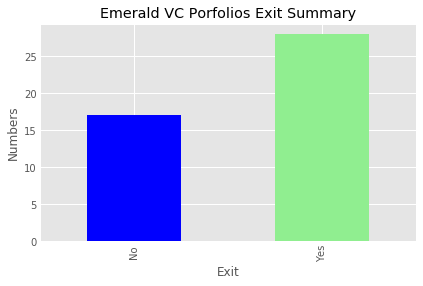

In [116]:
exit.plot(kind='bar', color=['blue', 'lightgreen'])
plt.ylabel('Numbers')
plt.title('Emerald VC Porfolios Exit Summary')
plt.show()